In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
DATA_PATH = "/Users/lukefoster/Documents/CompEtho/Cluster_Comparison_Pipeline"

all_DF = pd.read_csv(f"{DATA_PATH}/all_clusters.csv", index_col=0)

In [3]:
all_DF

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster56,cluster57,cluster58,cluster59,cluster60,cluster61,cluster62,cluster63,cluster64,cluster65
0,10BYmidfd_antmovie200928223820,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.197287,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,fr_no_antennae_antmovie200927211714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,00AAmidfr_antmovie200926195039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,04WTmidfr_antmovie201010202950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.253298,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,06WRmajfd_antmovie200929211318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.249012,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,05WOmajfd_antmovie201010205850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.260809,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
139,08dOminfd_antmovie200927211313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
140,10RYfr_left_antn_no_move_antmovie200927214552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.140485,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
141,mean,0.000205,0.001243,0.000135,0.000072,0.000022,0.000051,0.000058,0.000581,0.004983,...,0.160078,0.0,0.000149,0.000046,0.000108,0.000184,0.004035,0.001208,0.000341,0.000254


## Introducing ZIP (Zero-Inflated Poisson)

In [4]:
from patsy import dmatrices
import statsmodels.api as sm

### Formatting Data into Usable Dataframe

In [5]:
castes = ['maj', 'mid', 'min']

In [6]:
# remove video files that don't fit within specified caste keywords
try:
    for i in range(len(all_DF)):
        if any(caste in all_DF["Video File"][i] for caste in castes):
            pass
        else:
            all_DF = all_DF.drop(i)
except:
    print("already dropped un-wanted videos")


df = all_DF.reset_index(drop=True)

df["caste"] = ""

for i in range(len(df)):
    for caste in castes:
        if caste in df["Video File"][i]:
            df["caste"][i] += caste
            
for i in range(len(df)):
    if df.isnull()["cluster0"][i]:
        df = df.drop(i)
        
df = df.reset_index(drop=True)

<ipython-input-6-712b8847694e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["caste"][i] += caste


In [7]:
df

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster57,cluster58,cluster59,cluster60,cluster61,cluster62,cluster63,cluster64,cluster65,caste
0,10BYmidfd_antmovie200928223820,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,mid
1,00AAmidfr_antmovie200926195039,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,mid
2,04WTmidfr_antmovie201010202950,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,mid
3,06WRmajfd_antmovie200929211318,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,maj
4,04Ydmidfd_antmovie200924204640,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,15RTmidfr_antmovie200927233405,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,mid
124,03YBmajfr_antmovie200928195842,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,maj
125,03BPmajfr_antmovie200929200853,0.02723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02444,0.0,0.0,0.0,0.0,maj
126,05WOmajfd_antmovie201010205850,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,maj


### Keeping Track of Cluster Distribution Between Castes

In [51]:
count_dict = {}

for cluster in range(df.shape[1]-2):
    count_dict[f'cluster{cluster}'] = {caste : [] for caste in castes}
    
    for index,proportion in enumerate(df[f'cluster{cluster}']):
        for caste in castes:
            if proportion > 0 and df['caste'][index] == caste:
                count_dict[f'cluster{cluster}'][caste].append(df['Video File'][index])

count_dict

{'cluster0': {'maj': ['03BPmajfr_antmovie200929200853'], 'mid': [], 'min': []},
 'cluster1': {'maj': ['03dRmajfr_antmovie200924195844',
   '06dYmajfd_antmovie200924214927'],
  'mid': [],
  'min': []},
 'cluster2': {'maj': ['06dYmajfd_antmovie200924214927'], 'mid': [], 'min': []},
 'cluster3': {'maj': ['06dYmajfd_antmovie200924214927'], 'mid': [], 'min': []},
 'cluster4': {'maj': ['06dYmajfd_antmovie200924214927'], 'mid': [], 'min': []},
 'cluster5': {'maj': ['06dYmajfd_antmovie200924214927'], 'mid': [], 'min': []},
 'cluster6': {'maj': ['06dYmajfd_antmovie200924214927'], 'mid': [], 'min': []},
 'cluster7': {'maj': ['03dRmajfr_antmovie200924195844'], 'mid': [], 'min': []},
 'cluster8': {'maj': ['03YBmajfd_antmovie200928200603',
   '06dYmajfd_antmovie200924214927',
   '08GBmajfd_antmovie201010220356',
   '02RRmajfd_antmovie200924194252',
   '06dYmajfr_antmovie200924213405',
   '06dYmajfr_antmovie200924213217'],
  'mid': ['08WWmidfd_antmovie200926222746', '04WTmidfd_antmovie201010203755']

In [18]:
all_caste_clusters = []

for cluster,counts in count_dict.items():
    if all(len(counts[caste]) > 0 for caste in castes):
        all_caste_clusters.append(cluster)
        
all_caste_clusters

['cluster8',
 'cluster10',
 'cluster13',
 'cluster19',
 'cluster28',
 'cluster32',
 'cluster35',
 'cluster38',
 'cluster44',
 'cluster46',
 'cluster48',
 'cluster51',
 'cluster55',
 'cluster56']

In [50]:
single_caste_clusters = []

for cluster,counts in count_dict.items():
    count = 0
    for caste in castes:
        if len(counts[caste]) > 0:
            count += 1
    if count == 1:
        single_caste_clusters.append(cluster)

single_caste_clusters

['cluster0',
 'cluster1',
 'cluster2',
 'cluster3',
 'cluster4',
 'cluster5',
 'cluster6',
 'cluster7',
 'cluster9',
 'cluster11',
 'cluster12',
 'cluster14',
 'cluster15',
 'cluster16',
 'cluster18',
 'cluster21',
 'cluster22',
 'cluster23',
 'cluster24',
 'cluster25',
 'cluster26',
 'cluster27',
 'cluster29',
 'cluster31',
 'cluster33',
 'cluster34',
 'cluster37',
 'cluster40',
 'cluster41',
 'cluster43',
 'cluster45',
 'cluster47',
 'cluster49',
 'cluster52',
 'cluster54',
 'cluster58',
 'cluster59',
 'cluster60',
 'cluster61',
 'cluster63',
 'cluster64',
 'cluster65']

### Running ZIP for each Cluster:

In [79]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=106
Testing data set length=22


In [80]:
for i in range(66):
    formula = f"cluster{i} ~ caste"
    y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')
    
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, 
                                                  inflation='logit').fit()
    print(zip_training_results.summary())
    

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 34
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster0   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.09688
Time:                         10:38:08   Log-Likelihood:               -0.21424
converged:                        True   LL-Null:                      -0.23722
Covariance Type:             nonrobust   LLR p-value:                    0.9773
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_In

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/py

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster3   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.08429
Time:                         10:38:08   Log-Likelihood:              -0.085108
converged:                        True   LL-Null:                     -0.092942
Covariance Type:             nonrobust   LLR p-value:                    0.9922
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept     -199.4702        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.2917        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

Optimization terminated successfully.
         Current function value: 0.004979
         Iterations: 30
         Function evaluations: 34
         Gradient evaluations: 34
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster7   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1137
Time:                         10:38:08   Log-Likelihood:               -0.52777
converged:                        True   LL-Null:                      -0.59545
Covariance Type:             nonrobust   LLR p-value:                    0.9346
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_In

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster10   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0001451
Time:                         10:38:09   Log-Likelihood:                -36.051
converged:                       False   LL-Null:                       -36.056
Covariance Type:             nonrobust   LLR p-value:                    0.9948
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -17.9150   1186.322     -0.015      0.988   -2343.064    2307.234
inflate_caste[T.mid]    -5.4189   1.98e+04     -0.000      1.000   -3.88e+04    3.88e+04
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster13   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0007238
Time:                         10:38:09   Log-Likelihood:                -47.445
converged:                       False   LL-Null:                       -47.479
Covariance Type:             nonrobust   LLR p-value:                    0.9662
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -15.9632    447.455     -0.036      0.972    -892.960     861.033
inflate_caste[T.mid]    -4.8324   5577.928     -0.001      0.999   -1.09e+04    1.09e+04
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

Optimization terminated successfully.
         Current function value: 0.005507
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster17   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1179
Time:                         10:38:09   Log-Likelihood:               -0.58371
converged:                        True   LL-Null:                      -0.66175
Covariance Type:             nonrobust   LLR p-value:                    0.9249
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_In

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster20   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.04640
Time:                         10:38:09   Log-Likelihood:               -0.94996
converged:                       False   LL-Null:                      -0.99618
Covariance Type:             nonrobust   LLR p-value:                    0.9548
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -79.9453        nan        nan        nan         nan         nan
inflate_caste[T.mid]   -20.2475        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:699: RuntimeWarning: invalid va

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster24   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                     nan
Time:                         10:38:13   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.033749
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster28   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1175
Time:                         10:38:13   Log-Likelihood:                -3.5773
converged:                       False   LL-Null:                       -4.0537
Covariance Type:             nonrobust   LLR p-value:                    0.6210
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -49.0026   1.54e+07  -3.1

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster35   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                0.003823
Time:                         10:38:13   Log-Likelihood:                -3.3555
converged:                       False   LL-Null:                       -3.3683
Covariance Type:             nonrobust   LLR p-value:                    0.9872
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -29.6010   6.95e+05  -4.26e-05      1.000   -1.36e+06    1.36e+06
inflate_caste[T.mid]    -7.9685   2.79e+07  -2.85e-07      1.000   -5.47e+07    5.47e+07
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.036735
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster39   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1528
Time:                         10:38:13   Log-Likelihood:                -3.8939
converged:                       False   LL-Null:                       -4.5961
Covariance Type:             nonrobust   LLR p-value:                    0.4955
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -11.0865        nan      

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster42   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.05094
Time:                         10:38:14   Log-Likelihood:               -0.32912
converged:                       False   LL-Null:                      -0.34678
Covariance Type:             nonrobust   LLR p-value:                    0.9825
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -24.2619        nan        nan        nan         nan         nan
inflate_caste[T.mid]   -12.3266        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.079244
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster46   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0002501
Time:                         10:38:14   Log-Likelihood:                -8.3998
converged:                       False   LL-Null:                       -8.4019
Covariance Type:             nonrobust   LLR p-value:                    0.9979
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -16.5044    772.274     -

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster49   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.09333
Time:                         10:38:14   Log-Likelihood:               -0.17482
converged:                        True   LL-Null:                      -0.19282
Covariance Type:             nonrobust   LLR p-value:                    0.9822
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -74.7316        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.2667        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster53   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.06712
Time:                         10:38:14   Log-Likelihood:               -0.49608
converged:                       False   LL-Null:                      -0.53177
Covariance Type:             nonrobust   LLR p-value:                    0.9649
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -24.8722        nan        nan        nan         nan         nan
inflate_caste[T.mid]   -12.6226        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster57   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                     nan
Time:                         10:38:18   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster60   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                     nan
Time:                         10:38:21   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:699: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:704: RuntimeWarning: invalid value encountered in subtract
  xr =

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster65   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                     nan
Time:                         10:38:24   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


### Dealing with NaN Results
ZIP returns NaN results for a specific cluster when it only has zero values for a single caste, in either the training or testing set (df[mask] and df[~mask]). Maybe something to do with a divide by zero error, I'm not sure.
To keep track of these clusters, every time a cluster has successful, non-nan results, I add the cluster number to a list of "good clusters" and only print out the good results.

In [81]:
good_clusters = []

for i in range(66):
    formula = f"cluster{i} ~ caste"
    y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')
    
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, 
                                                  inflation='logit').fit()
    if zip_training_results.pvalues[0] >= 0 or zip_training_results.pvalues[0] < 0:
        good_clusters.append(i)
        print(zip_training_results.summary())
print(f"GOOD CLUSTERS: {good_clusters}")

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 34
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.009568
         Iterations: 32
         Function evaluations: 36
         Gradient evaluations: 36
         Current function value: 0.001409
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000803
         Iterations: 32
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.000302
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 0.000590
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
Optimization terminated successfully.
      

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

Optimization terminated successfully.
         Current function value: 0.004979
         Iterations: 30
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.031907
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster8   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                 0.09808
Time:                         10:38:38   Log-Likelihood:                -3.3822
converged:                       False   LL-Null:                       -3.7500
Covariance Type:             nonrobust   LLR p-value:                    0.6923
                           coef    std err          z 

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

         Current function value: 0.001202
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.447591
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster13   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0007238
Time:                         10:38:38   Log-Likelihood:                -47.445
converged:                       False   LL-Null:                       -47.479
Covariance Type:             nonrobust   LLR p-value:                    0.9662
                           coef    std err          z      P>|z|      [0.025      0.975]
---

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

Optimization terminated successfully.
         Current function value: 0.001906
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 32
         Current function value: 0.092000
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster19   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                0.007640
Time:                         10:38:38   Log-Likelihood:                -9.7520
converged:                       False   LL-Null:                       -9.8271
Covariance Type:             nonrobust   LLR p-value:                    0.9277
                           coef    std err          z 

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/py

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.005652
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 0.002128
         Iterations: 33
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.000993
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.033749
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster28   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:               

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib

Optimization terminated successfully.
         Current function value: 0.004977
         Iterations: 32
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.004557
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 0.003443
         Iterations: 28
         Function evaluations: 34
         Gradient evaluations: 34
         Current function value: 0.011687
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster32   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:             

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

         Current function value: 0.031655
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster35   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                0.003823
Time:                         10:38:39   Log-Likelihood:                -3.3555
converged:                       False   LL-Null:                       -3.3683
Covariance Type:             nonrobust   LLR p-value:                    0.9872
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -29.6010   6.95e+05  -4.2

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.002310
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 0.002041
         Iterations: 34
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.003105
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.000600
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.083284
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster44   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:  

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.001681
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.079244
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster46   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0002501
Time:                         10:38:39   Log-Likelihood:                -8.3998
converged:                       False   LL-Null:                       -8.4019
Covariance Type:             nonrobust   LLR p-value:                    0.9979
                           coef    std err          z      P>|z|      [0.025      0.975]
---

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/py

Optimization terminated successfully.
         Current function value: 0.001649
         Iterations: 33
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.004803
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
         Current function value: 0.397524
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster51   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:                0.001655
Time:                         10:38:40   Log-Likelihood:                -42.138
converged:                       False   LL-Null:                       -42.207


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib

         Current function value: 0.394545
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster55   No. Observations:                  106
Model:             ZeroInflatedPoisson   Df Residuals:                      103
Method:                            MLE   Df Model:                            2
Date:                 Thu, 05 Aug 2021   Pseudo R-squ.:               0.0002363
Time:                         10:38:40   Log-Likelihood:                -41.822
converged:                       False   LL-Null:                       -41.832
Covariance Type:             nonrobust   LLR p-value:                    0.9902
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -16.3978    555.733     -

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model

## Introducing UMAP

In [82]:
import umap
from sklearn.preprocessing import StandardScaler

import matplotlib.patches as mpatches

In [83]:
reducer = umap.UMAP()

In [84]:
cluster_strings = []
for i in range(66):
    cluster_strings.append(f'cluster{i}')

cluster_data = df[
    cluster_strings
].values

scaled_cluster_data = StandardScaler().fit_transform(cluster_data)

In [85]:
embedding = reducer.fit_transform(scaled_cluster_data)
embedding.shape

(128, 2)

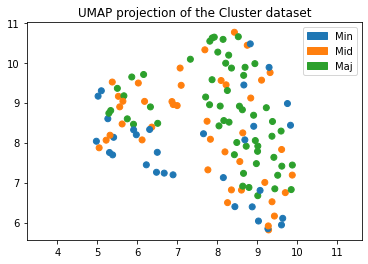

In [86]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.caste.map({"min":0, "mid":1, "maj":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Cluster dataset')


min_patch = mpatches.Patch(color=sns.color_palette()[0], label='Min')
mid_patch = mpatches.Patch(color=sns.color_palette()[1], label='Mid')
maj_patch = mpatches.Patch(color=sns.color_palette()[2], label='Maj')

plt.legend(handles=[min_patch, mid_patch, maj_patch])

plt.savefig("cluster_umap.png")
plt.show()